In [11]:
import os
import glob

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter


from utils.jupyter_utils import ImageLinePlotter

#  2007_000032.png


error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


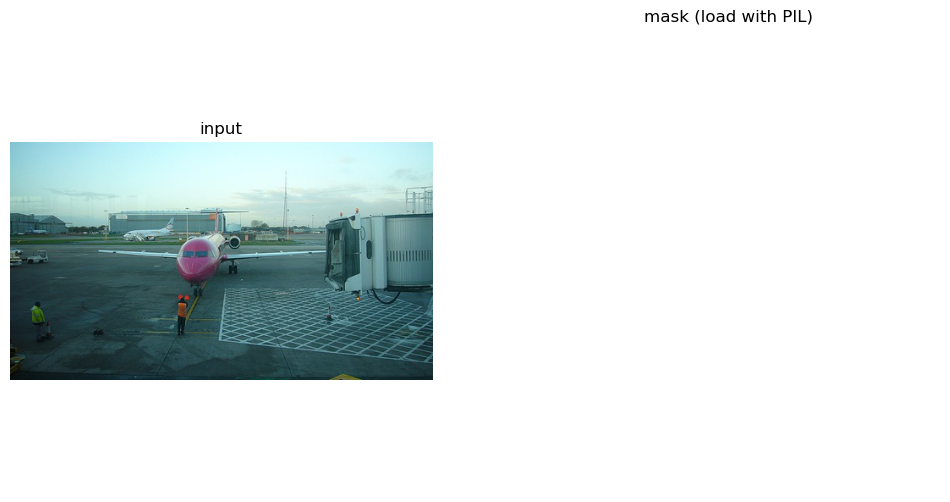

In [25]:
ORG_DIR = os.path.join('./', 'VOC2012/','JPEGImages/')
SEG_DIR = os.path.join('./', 'VOC2012/','SegmentationClass/')

segs = glob.glob(os.path.join(SEG_DIR,'*.png'))
segs.sort()

for seg_file in segs[:5]:
    print('# ', os.path.basename(seg_file))
    fname, _ = os.path.splitext(os.path.basename(seg_file))
    org_file = os.path.join(ORG_DIR, fname + '.jpg')
    if not os.path.exists(org_file):
        print('not found org_file : ', org_file)
    org_img = cv2.imread(org_file)
    seg_img_PIL = np.array(Image.open(seg_file))

    plotter = ImageLinePlotter(plot_area_num=2)
    plotter.add_image(org_img, title='input')
    plotter.add_image(seg_img_PIL, title='mask (load with PIL)')
    plotter.show_plot()

In [8]:
ORG_DIR = os.path.join('.', '/','VOC2012', '/','JPEGImages')
SEG_DIR = os.path.join('.','/', 'VOC2012', '/','SegmentationClass')

segs = glob.glob(os.path.join(SEG_DIR,'/', '*.png'))
segs.sort()

for seg_file in segs[:5]:
    print('# ', os.path.basename(seg_file))
    fname, _ = os.path.splitext(os.path.basename(seg_file))
    org_file = os.path.join(ORG_DIR, fname + '.jpg')
    if not os.path.exists(org_file):
        print('not found org_file : ', org_file)
    org_img = cv2.imread(org_file)
    seg_img_PIL = np.array(Image.open(seg_file))
    seg_img_cv2 = cv2.imread(seg_file)

    plotter = ImageLinePlotter(plot_area_num=3)
    plotter.add_image(org_img, title='input')
    plotter.add_image(seg_img_PIL, title='mask (load with PIL)')
    plotter.add_image(seg_img_cv2, title='mask (load with cv2)')
    plotter.show_plot()

In [9]:
import shutil

TARGET_DIR = os.path.join('.', 'target_data')

ID_PERSON = 15
ID_CAT = 8
ID_DOG = 12

cls_counters = {}
for seg_file in segs:
    seg_img_PIL = np.array(Image.open(seg_file))

    copy_to = ''
    if np.any(seg_img_PIL == ID_PERSON):
         copy_to += 'person_'
    if np.any(seg_img_PIL == ID_CAT):
        copy_to += 'cat_'
    if np.any(seg_img_PIL == ID_DOG):
        copy_to += 'dog_'

    if copy_to == '':
        continue
    if not copy_to in cls_counters.keys():
            cls_counters[copy_to] = 0
    cls_counters[copy_to] += 1

    copy_path = os.path.join(TARGET_DIR, copy_to)
    if not os.path.exists(copy_path):
        os.makedirs(copy_path)
    shutil.copy(seg_file, copy_path)

print(cls_counters)

{}


In [4]:
gs

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [5]:
#list 2.4
fname = np.genfromtxt('result.csv',dtype='str', delimiter=',', skip_header=1, usecols=(0))


In [6]:
fname

array(['JPCLN001', 'JPCLN002', 'JPCLN003', 'JPCLN004', 'JPCLN005',
       'JPCNN001', 'JPCNN002', 'JPCNN003', 'JPCNN004', 'JPCNN005'],
      dtype='<U8')

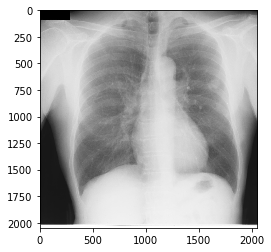

In [7]:
#list 2.5

chest01=cv2.imread("./chestimage_PNG/JPCLN001.png")
plt.imshow(chest01)
plt.show()

In [8]:
chest01.shape

(2048, 2048, 3)

In [9]:
chest01.dtype

dtype('uint8')

In [10]:
# list 2.6
chest32 = np.array(
    img_to_array(
        load_img("./chestimage_PNG/JPCLN001.png",
                 target_size=(32,32))))/255.0

In [11]:
# list 2.7

files_PNG = sorted([filename for filename in listdir('./chestimage_PNG/') if not filename.startswith('.')])
                                               
chest_PNG = np.zeros((len(files_PNG), 32, 32, 3))

for i in range(0,len(files_PNG)):
    fnameform ='./chestimage_PNG/%s' % files_PNG[i]
    chest_PNG[i]=np.array(img_to_array(load_img(fnameform,target_size=(32,32))))/255.0

In [12]:
files_PNG

['JPCLN001.png',
 'JPCLN002.png',
 'JPCLN003.png',
 'JPCLN004.png',
 'JPCLN005.png',
 'JPCNN001.png',
 'JPCNN002.png',
 'JPCNN003.png',
 'JPCNN004.png',
 'JPCNN005.png']

In [13]:
len(files_PNG)

10

In [14]:
#### list2.8は，Jupyter Notebookでの動作ではありません．ターミナルの画面に戻って操作する必要があります．
####　セットアップでエラーがなければ不要です．

In [15]:
# list 2.9
import pydicom

In [16]:
# list 2.10
chest_DICOM = pydicom.read_file('./chestimages_DICOM/JPCLN001.dcm')

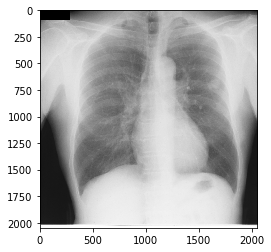

In [17]:
plt.imshow(chest_DICOM.pixel_array, cmap='gray')

In [18]:
# list 2.11
w = chest_DICOM.Columns
h = chest_DICOM.Rows
D4d = np.zeros((1,h,w,1))

tmp = np.zeros((h,w))
tmp=chest_DICOM.pixel_array
tmp2= np.reshape(tmp,(h,w,1))

D4d[0]=tmp2

In [19]:
# list 2.12
tmp8bit = tmp/16
tmp8bit.astype(np.uint8)
cv2.imwrite('D8b.png', tmp8bit)

True

In [20]:
### DICOMのCT画像データは各自ダウンロードしてください．
### CT 画像は，Cancer Image Archive(https://www.cancerimagingarchive.net)におい て，
####「SPIE-AAPM Lung CT Challenge」から可能です．
### ダウンロードした画像は，CTimagesフォルダーを作成してその中に保存してください．

CTimage = pydicom.read_file('./CTimages/000000.dcm')

w = CTimage.Columns
h = CTimage.Rows

print('w = ',w)
print('h = ',h)
print('IN = ',CTimage.InstanceNumber)

w =  512
h =  512
IN =  46


In [21]:
### DICOMのCT画像データは各自ダウンロードしてください．
### CT 画像は，Cancer Image Archive(https://www.cancerimagingarchive.net)におい て，
####「SPIE-AAPM Lung CT Challenge」から可能です．
### ダウンロードした画像は，CTimagesフォルダーを作成してその中に保存してください．


#list 2.13
files_CT = sorted([filename for filename in listdir('./CTimages/') if not filename.startswith('.')])
nslice = len(files_CT)

tmp = np.zeros((h,w),dtype="float32")
ctvoldata = np.zeros((nslice, h, w, 1),dtype="float32")

for i in range(0, nslice):
    CTimage = pydicom.read_file('./CTimages/%s'%files_CT[i]) 
    
    intercept = CTimage.RescaleIntercept
    slope = CTimage.RescaleSlope
    slicenum = CTimage.InstanceNumber
    
    tmp = CTimage.pixel_array
    tmp = slope*tmp+intercept

    tmp3d = np.reshape(tmp,(h,w,1))
    ctvoldata[slicenum-1] = tmp3d

                       
ctvoldata.tofile('ctimage.raw')
